# Программирование на языке Python
## Семинар 12. Pandas

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../Занятие 13/zomato.csv', encoding='Windows-1251')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

#### Задача
Имея сырые данные, сгенерировать как можно большее количество полезных фичей для предсказания оценки ресторана.

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Исследуем таргет - Aggregate rating

In [5]:
df['Aggregate rating'].describe().round(2)

count    9551.00
mean        2.67
std         1.52
min         0.00
25%         2.50
50%         3.20
75%         3.70
max         4.90
Name: Aggregate rating, dtype: float64

<AxesSubplot:>

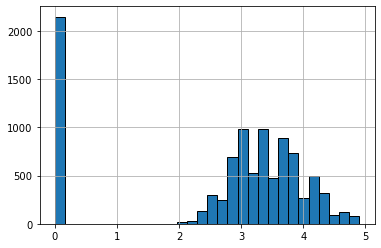

In [6]:
df['Aggregate rating'].hist(bins=30, edgecolor='black')

In [7]:
df.loc[df['Aggregate rating']==0,:]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
30,6600060,Sandubas Cafн©,30,Brasн_lia,"Edifн_cio Josн© Severo, SCS 6, Bloco A, Loja 9...",Asa Sul,"Asa Sul, Brasн_lia",-47.890167,-15.797000,"Brazilian, Cafe",30,Brazilian Real(R$),No,No,No,No,1,0.0,White,Not rated,2
58,7305048,Quiosque Chopp Brahma,30,Rio de Janeiro,"Madureira Shopping - Loja 289/290, Piso 2, Est...",Madureira,"Madureira, Rio de Janeiro",-43.341164,-22.870413,"Bar Food, Brazilian",70,Brazilian Real(R$),No,No,No,No,3,0.0,White,Not rated,1
69,6710645,Cantinho da Gula,30,SнЈo Paulo,"Rua Pedroso Alvarenga, 522, Itaim Bibi, SнЈo P...",Itaim Bibi,"Itaim Bibi, SнЈo Paulo",-46.675667,-23.581000,Brazilian,55,Brazilian Real(R$),No,No,No,No,2,0.0,White,Not rated,0
77,6701419,Divino FogнЈo,30,SнЈo Paulo,"Shopping MetrнЗ Santa Cruz - Piso L2, Rua Domi...","Shopping MetrнЗ Santa Cruz, Vila Mariana","Shopping MetrнЗ Santa Cruz, Vila Mariana, SнЈo...",-46.637167,-23.599500,"Brazilian, Mineira",65,Brazilian Real(R$),No,No,No,No,3,0.0,White,Not rated,2
78,6703956,Super Grill,30,SнЈo Paulo,"Shopping Morumbi - Piso Lazer, Avenida Roque P...","Shopping Morumbi, Santo Amaro","Shopping Morumbi, Santo Amaro, SнЈo Paulo",-46.698574,-23.622925,Brazilian,50,Brazilian Real(R$),No,No,No,No,2,0.0,White,Not rated,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9109,18277023,Bread & Pasta,1,Noida,"Shop 15, Near HDFC Bank, Tulip Mall, Sector 48...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367303,28.557929,Fast Food,400,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1
9110,18313203,Chillies Cafe,1,Noida,"G-11, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367188,28.557842,Fast Food,600,Indian Rupees(Rs.),No,No,No,No,2,0.0,White,Not rated,3
9111,18254559,Platters,1,Noida,"Shop 1, Tulip Mall, Near HDFC Bank, Sector 48,...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367322,28.557930,"North Indian, Chinese",500,Indian Rupees(Rs.),No,No,No,No,2,0.0,White,Not rated,0
9112,18255132,The Grand,1,Noida,"G-5, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367188,28.557852,"Raw Meats, Fast Food",250,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1


In [19]:
df.groupby(['Rating color', 'Rating text']).size()

Rating color  Rating text
Dark Green    Excellent       301
Green         Very Good      1079
Orange        Average        3737
Red           Poor            186
White         Not rated      2148
Yellow        Good           2100
dtype: int64

In [ ]:
#1 необходимо отфильтровать строки с отсутствующей оценкой

## Фичи
- Country Code	           - берем, выйдем на название страны
- Longitude, Latitude - берем, но только для нелинейных моделей
- Address - исследуем наиболее часто встречающиеся слова
- Cuisines	               - берем, посчитать количество разнообразия + сделать дамми-переменные из наиболее частых категорий
- Average Cost for two       - берем, только приводим к единой валюте	
- Currency	               - для преобразования
- Has Table booking 	       - берем, только преобразуем в 1 и 0
- Has Online delivery	       - берем, только преобразуем в 1 и 0
- Is delivering now	       - берем, только преобразуем в 1 и 0
- Switch to order menu       - берем, только преобразуем в 1 и 0
- Price range	               - берем
- country_rating_for_big_mac - новая фича по показателям из https://fxssi.com/big-mac-index

In [3]:
data = df[df['Rating text'] != 'Not rated'].dropna().reset_index(drop=True)

#### Исследуем Cuisines

In [4]:
cuisine_list = pd.Series([cuisune for lst in data['Cuisines'].str.split(', ').tolist() for cuisune in lst])
cuisine_vc = cuisine_list.value_counts()

cuisines_to_choose = cuisine_vc.index[cuisine_vc.values >= 200]

#### Address

In [5]:
import re
from nltk.corpus import stopwords
from string import punctuation

punctuation = punctuation.replace('_', '')
punctuation_re = re.compile(f'[{re.escape(punctuation) }\d]')

def fix_string(string: str) -> str:
    string = punctuation_re.sub('', string).lower()

    return string.split()

In [6]:
address_list = pd.Series([address for lst in data['Address'].map(fix_string).tolist() for address in lst if len(address) > 2])
address_list = address_list[~address_list.isin(set(stopwords.words('english')))]
address_vc = address_list.value_counts()

address_to_choose = address_vc.iloc[:20].index

#### Изготовление фичей

In [7]:
conversion_rates = {             
     'Dollar($)':1,
     'Brazilian Real(R$)':0.2,
     'Indian Rupees(Rs.)':0.01,
     'Indonesian Rupiah(IDR)':0.000064,
     'NewZealand($)':0.58,
     'Botswana Pula(P)':0.07,
     'Qatari Rial(QR)':0.275,
     'Rand(R)':0.052,
     'Sri Lankan Rupee(LKR)':0.0031,
     'Turkish Lira(TL)':0.035,
     'Emirati Diram(AED)':0.27,
     'Pounds(ЊЈ)':1.21
}

features = [
    'Count Cuisines', *cuisines_to_choose, *address_to_choose, 'Avg Cost', 'Has Table booking',
    'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Longitude', 'Latitude'
]

# Country Code
country_codes = pd.read_excel('../Занятие 13/Country-Code.xlsx')
data_model = data.merge(country_codes, on=['Country Code'], how='left', validate='m:1')
data_model = pd.get_dummies(data_model, columns=['Country'], dtype=int)

features += [f'Country_{c}' for c in country_codes['Country'].tolist()]

# Cuisines
data_model['Count Cuisines'] = data_model['Cuisines'].str.count(',') + 1

for cuisine in cuisines_to_choose:
    data_model[cuisine] = data_model['Cuisines'].str.contains(cuisine).astype(int)

# Address
for address in address_to_choose:
    data_model[address] = data_model['Address'].map(fix_string).map(lambda lst: address in lst).astype(int)

# Average Cost for two
data_model['Avg Cost'] = data_model['Average Cost for two'] * data_model['Currency'].map(conversion_rates)

# dummy vars
dummy_mapper = {
    'Yes': 1,
    'No': 0
}
data_model.loc[:, 'Has Table booking':'Switch to order menu'] = data_model.loc[:, 'Has Table booking':'Switch to order menu'].apply(
    lambda col: col.map(dummy_mapper)
)

# final filter
X = data_model[features]
y = data_model['Aggregate rating']

#### Обучаем и проверяем

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [20]:
# обучение (fit)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [32]:
import pickle

with open('random_forest_model.pickle', 'wb') as outfile:
    pickle.dump(rf, outfile)

In [21]:
predict_test = rf.predict(X_test)

In [24]:
r2_score(predict_test, y_test)

0.1682157278819283

In [27]:
feature_imp = pd.DataFrame(
    {
        'name': rf.feature_names_in_,
        'importance': rf.feature_importances_
    }
)

In [31]:
feature_imp.sort_values(by='importance', ascending=False).iloc[:20]

,name,importance
38,Avg Cost,0.280332
45,Latitude,0.217835
44,Longitude,0.171189
0,Count Cuisines,0.026625
46,Country_India,0.022378
40,Has Online delivery,0.018558
1,North Indian,0.018503
8,Desserts,0.011757
2,Chinese,0.011215
6,Continental,0.011183


In [ ]:
y = k1X1 + k2X2 + ... + knXn

In [94]:
X

,Country,Count Cuisines,North Indian,Chinese,Fast Food,Mughlai,Italian,Continental,Cafe,Desserts,Bakery,South Indian,Street Food,American,Pizza,Mithai,Burger,Thai,Asian,new,delhi,road,sector,market,nagar,floor,near,gurgaon,noida,shop,mall,opposite,vihar,ground,main,phase,block,dlf,place,Avg Cost,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Longitude,Latitude
0,Phillipines,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,77.000,1,0,0,0,3,121.027535,14.565443
1,Phillipines,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84.000,1,0,0,0,3,121.014101,14.553708
2,Phillipines,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,280.000,1,0,0,0,4,121.056831,14.581404
3,Phillipines,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,105.000,0,0,0,0,4,121.056475,14.585318
4,Phillipines,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,105.000,1,0,0,0,4,121.057508,14.584450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7389,Turkey,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.800,0,0,0,0,3,28.977392,41.022793
7390,Turkey,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.675,0,0,0,0,3,29.041297,41.009847
7391,Turkey,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.950,0,0,0,0,4,29.034640,41.055817
7392,Turkey,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.200,0,0,0,0,4,29.036019,41.057979


In [76]:
address_to_choose

Index(['new', 'delhi', 'road', 'sector', 'market', 'nagar', 'floor', 'near',
       'gurgaon', 'noida', 'shop', 'mall', 'opposite', 'vihar', 'ground',
       'main', 'phase', 'block', 'dlf', 'place'],
      dtype='object')

In [70]:
data_model

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Count Cuisines
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,3
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,1
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines,4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines,2
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7389,5915730,NamlЫ± Gurme,208,ЫБstanbul,"KemankeЃф Karamustafa PaЃфa Mahallesi, RЫ±htЫ±...",Karakн_y,"Karakн_y, ЫБstanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788,Turkey,1
7390,5908749,Ceviz AЫфacЫ±,208,ЫБstanbul,"KoЃфuyolu Mahallesi, Muhittin нмstн_ndaЫф Cadd...",KoЃфuyolu,"KoЃфuyolu, ЫБstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034,Turkey,3
7391,5915807,Huqqa,208,ЫБstanbul,"Kuruн_eЃфme Mahallesi, Muallim Naci Caddesi, N...",Kuruн_eЃфme,"Kuruн_eЃфme, ЫБstanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661,Turkey,2
7392,5916112,AЃфЃфk Kahve,208,ЫБstanbul,"Kuruн_eЃфme Mahallesi, Muallim Naci Caddesi, N...",Kuruн_eЃфme,"Kuruн_eЃфme, ЫБstanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901,Turkey,1


In [10]:
data_model = df.merge(country_codes, on=['Country Code'], how='left')

In [21]:
data_model.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Count Cuisines,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,3.0,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,1.0,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,4.0,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,2.0,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,2.0,Phillipines


In [11]:
data_model.groupby(['Has Table booking']).size()

Has Table booking
No     8393
Yes    1158
dtype: int64

In [12]:
data_model.groupby(['Switch to order menu']).size()

Switch to order menu
No    9551
dtype: int64

In [13]:
dummy_mapper={'Yes':1, 'No':0}
data_model.loc[:, 'Has Table booking':'Switch to order menu'] = data_model.loc[:, 'Has Table booking':'Switch to order menu'].apply(
lambda col: col.map(dummy_mapper)
)

In [25]:
data_model

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Count Cuisines,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),1,0,0,0,3,4.8,Dark Green,Excellent,314,3.0,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),1,0,0,0,3,4.5,Dark Green,Excellent,591,1.0,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),1,0,0,0,4,4.4,Green,Very Good,270,4.0,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),0,0,0,0,4,4.9,Dark Green,Excellent,365,2.0,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),1,0,0,0,4,4.8,Dark Green,Excellent,229,2.0,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlЫ± Gurme,208,ЫБstanbul,"KemankeЃф Karamustafa PaЃфa Mahallesi, RЫ±htЫ±...",Karakн_y,"Karakн_y, ЫБstanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),0,0,0,0,3,4.1,Green,Very Good,788,1.0,Turkey
9547,5908749,Ceviz AЫфacЫ±,208,ЫБstanbul,"KoЃфuyolu Mahallesi, Muhittin нмstн_ndaЫф Cadd...",KoЃфuyolu,"KoЃфuyolu, ЫБstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),0,0,0,0,3,4.2,Green,Very Good,1034,3.0,Turkey
9548,5915807,Huqqa,208,ЫБstanbul,"Kuruн_eЃфme Mahallesi, Muallim Naci Caddesi, N...",Kuruн_eЃфme,"Kuruн_eЃфme, ЫБstanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),0,0,0,0,4,3.7,Yellow,Good,661,2.0,Turkey
9549,5916112,AЃфЃфk Kahve,208,ЫБstanbul,"Kuruн_eЃфme Mahallesi, Muallim Naci Caddesi, N...",Kuruн_eЃфme,"Kuruн_eЃфme, ЫБstanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),0,0,0,0,4,4.0,Green,Very Good,901,1.0,Turkey


In [14]:
data_model[['Country','Currency']].groupby(['Country','Currency']).size()

Country         Currency              
Australia       Dollar($)                   24
Brazil          Brazilian Real(R$)          60
Canada          Dollar($)                    4
India           Indian Rupees(Rs.)        8652
Indonesia       Indonesian Rupiah(IDR)      21
New Zealand     NewZealand($)               40
Phillipines     Botswana Pula(P)            22
Qatar           Qatari Rial(QR)             20
Singapore       Dollar($)                   20
South Africa    Rand(R)                     60
Sri Lanka       Sri Lankan Rupee(LKR)       20
Turkey          Turkish Lira(TL)            34
UAE             Emirati Diram(AED)          60
United Kingdom  Pounds(ЊЈ)                  80
United States   Dollar($)                  434
dtype: int64

In [15]:
conversion_rates = {             
     'Dollar($)':1,
     'Brazilian Real(R$)':0.2,
     'Indian Rupees(Rs.)':0.01,
     'Indonesian Rupiah(IDR)':0.000064,
     'NewZealand($)':0.58,
     'Botswana Pula(P)':0.07,
     'Qatari Rial(QR)':0.275,
     'Rand(R)':0.052,
     'Sri Lankan Rupee(LKR)':0.0031,
     'Turkish Lira(TL)':0.035,
     'Emirati Diram(AED)':0.27,
     'Pounds(ЊЈ)':1.21
}

In [16]:
data_model['Avg Cost'] = data_model['Average Cost for two']*data_model['Currency'].map(conversion_rates)

In [30]:
data_model.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Count Cuisines,Country,Avg Cost
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),1,0,0,0,3,4.8,Dark Green,Excellent,314,3.0,Phillipines,77.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),1,0,0,0,3,4.5,Dark Green,Excellent,591,1.0,Phillipines,84.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),1,0,0,0,4,4.4,Green,Very Good,270,4.0,Phillipines,280.0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),0,0,0,0,4,4.9,Dark Green,Excellent,365,2.0,Phillipines,105.0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),1,0,0,0,4,4.8,Dark Green,Excellent,229,2.0,Phillipines,105.0


In [17]:
def continent(x):
    if (x in ['United States', 'Canada', 'Brazil']):
        return ('America')
    elif (x in ['India', 'Phillipines', 'Sri Lanka', 'UAE', 'Indonesia', 'Qatar', 'Singapore']):
        return ('Asia')
    elif (x in ['Australia', 'New Zealand']):
        return ('Australia_continent')
    elif (x in ['Turkey', 'United Kingtom']):
        return ('Europe')
    else:
        return ('Africa')

In [18]:
data_model['Continent'] = data_model['Country'].apply(continent)
data_model.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Count Cuisines,Country,Avg Cost,Continent
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),1,0,0,0,3,4.8,Dark Green,Excellent,314,3.0,Phillipines,77.0,Asia
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),1,0,0,0,3,4.5,Dark Green,Excellent,591,1.0,Phillipines,84.0,Asia
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),1,0,0,0,4,4.4,Green,Very Good,270,4.0,Phillipines,280.0,Asia
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),0,0,0,0,4,4.9,Dark Green,Excellent,365,2.0,Phillipines,105.0,Asia
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),1,0,0,0,4,4.8,Dark Green,Excellent,229,2.0,Phillipines,105.0,Asia


In [36]:
data_model.groupby(['Country']).size()

Country
Australia           24
Brazil              60
Canada               4
India             8652
Indonesia           21
New Zealand         40
Phillipines         22
Qatar               20
Singapore           20
South Africa        60
Sri Lanka           20
Turkey              34
UAE                 60
United Kingdom      80
United States      434
dtype: int64

In [38]:
big_mac = {'Australia':4.63,
'Brazil':4.25,
'Canada':5.25,
'India':2.39,
'Indonesia':2.34,
'New Zealand':4.43,
'Phillipines':2.75,
'Qatar':3.57,
'Singapore':4.24,
'South Africa':2.37,
'Sri Lanka':3.72,
'Turkey':2.68,
'UAE':4.90,
'United Kingdom':4.77,
'United States':5.15}

In [40]:
data_model['country_rating_for_big_mac'] = data_model['Country'].map(big_mac)

In [41]:
data_model

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Count Cuisines,Country,Avg Cost,Continent,country_rating_for_big_mac
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),1,0,0,0,3,4.8,Dark Green,Excellent,314,3.0,Phillipines,77.000,Asia,2.75
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),1,0,0,0,3,4.5,Dark Green,Excellent,591,1.0,Phillipines,84.000,Asia,2.75
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),1,0,0,0,4,4.4,Green,Very Good,270,4.0,Phillipines,280.000,Asia,2.75
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),0,0,0,0,4,4.9,Dark Green,Excellent,365,2.0,Phillipines,105.000,Asia,2.75
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),1,0,0,0,4,4.8,Dark Green,Excellent,229,2.0,Phillipines,105.000,Asia,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlЫ± Gurme,208,ЫБstanbul,"KemankeЃф Karamustafa PaЃфa Mahallesi, RЫ±htЫ±...",Karakн_y,"Karakн_y, ЫБstanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),0,0,0,0,3,4.1,Green,Very Good,788,1.0,Turkey,2.800,Europe,2.68
9547,5908749,Ceviz AЫфacЫ±,208,ЫБstanbul,"KoЃфuyolu Mahallesi, Muhittin нмstн_ndaЫф Cadd...",KoЃфuyolu,"KoЃфuyolu, ЫБstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),0,0,0,0,3,4.2,Green,Very Good,1034,3.0,Turkey,3.675,Europe,2.68
9548,5915807,Huqqa,208,ЫБstanbul,"Kuruн_eЃфme Mahallesi, Muallim Naci Caddesi, N...",Kuruн_eЃфme,"Kuruн_eЃфme, ЫБstanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),0,0,0,0,4,3.7,Yellow,Good,661,2.0,Turkey,5.950,Europe,2.68
9549,5916112,AЃфЃфk Kahve,208,ЫБstanbul,"Kuruн_eЃфme Mahallesi, Muallim Naci Caddesi, N...",Kuruн_eЃфme,"Kuruн_eЃфme, ЫБstanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),0,0,0,0,4,4.0,Green,Very Good,901,1.0,Turkey,4.200,Europe,2.68


In [43]:
data_model.groupby(['Aggregate rating','Rating color','Rating text']).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [44]:
rating = data_model.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

In [45]:
rating

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


Text(0.5, 1.0, 'Ratings')

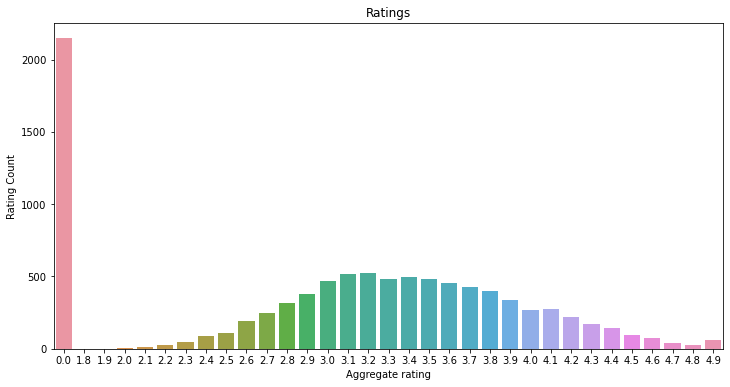

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
sns.barplot(x='Aggregate rating', y = 'Rating Count', data= rating)
plt.title('Ratings')